In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("SuperStoreUS.csv")

In [3]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [4]:
dataset['Product Base Margin'] = dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())

In [5]:
dataset['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: count, dtype: int64

In [6]:
dataset.shape

(1952, 25)

In [7]:
dataset['Order Priority'] = dataset['Order Priority'].str.strip()


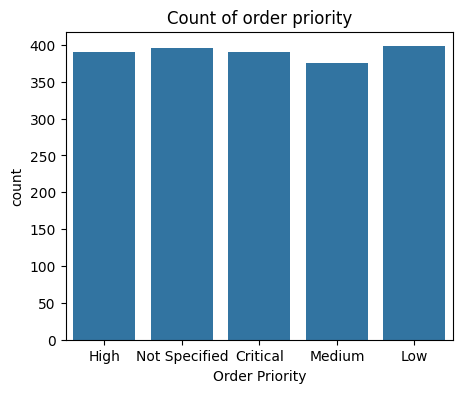

In [8]:
plt.figure(figsize= (5,4))
sns.countplot(data = dataset, x = "Order Priority")
plt.title("Count of order priority")
plt.savefig("counts of order.jpg")
plt.show()

In [9]:
dataset["Ship Mode"].value_counts()

Ship Mode
Regular Air       1437
Delivery Truck     275
Express Air        240
Name: count, dtype: int64

In [10]:
x = dataset["Ship Mode"].value_counts().index
y = dataset["Ship Mode"].value_counts().values

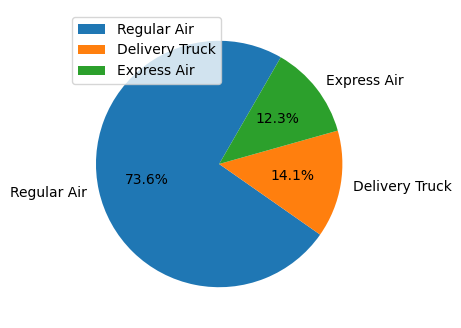

In [11]:
plt.figure(figsize= (5,4))
plt.pie(y,labels = x,startangle=60,autopct="%0.1f%%")
plt.legend(loc = 2)
plt.show()

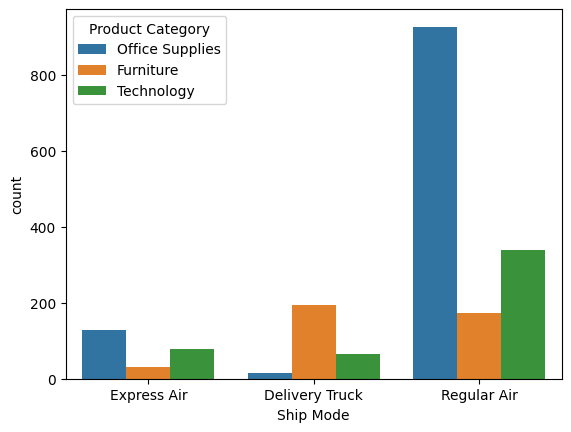

In [12]:
sns.countplot(x="Ship Mode",data = dataset,hue = "Product Category")
plt.show()

In [13]:
dataset["Customer Segment"].value_counts()

Customer Segment
Corporate         684
Home Office       470
Consumer          410
Small Business    388
Name: count, dtype: int64

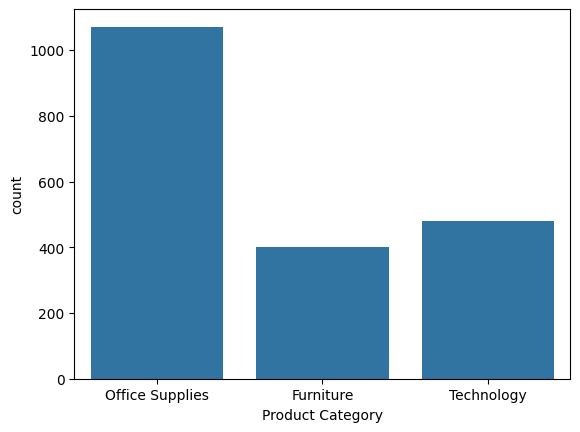

In [14]:
sns.countplot(x="Product Category",data = dataset)
plt.show()

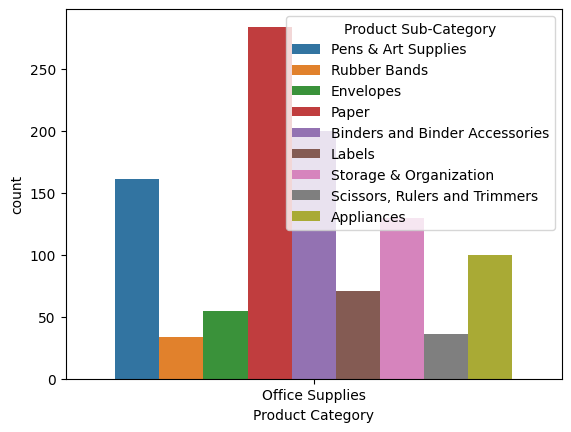

In [15]:
sns.countplot(x="Product Category",data = dataset[dataset["Product Category"]=="Office Supplies"],hue= "Product Sub-Category")
plt.show()

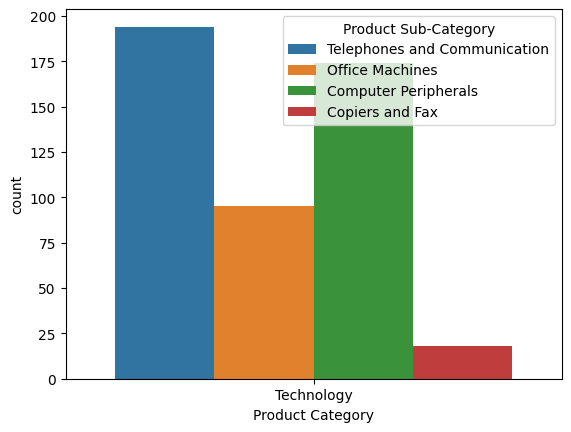

In [16]:
sns.countplot(x="Product Category",data = dataset[dataset["Product Category"]=="Technology"],hue= "Product Sub-Category")
plt.show()

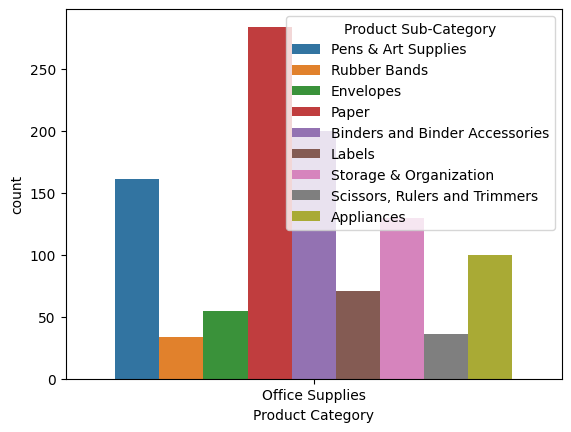

In [17]:
sns.countplot(x="Product Category",data = dataset[dataset["Product Category"]=="Office Supplies"],hue= "Product Sub-Category")
plt.show()

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1952 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

In [19]:
dataset.dtypes


Row ID                    int64
Order Priority           object
Discount                float64
Unit Price              float64
Shipping Cost           float64
Customer ID               int64
Customer Name            object
Ship Mode                object
Customer Segment         object
Product Category         object
Product Sub-Category     object
Product Container        object
Product Name             object
Product Base Margin     float64
Country                  object
Region                   object
State or Province        object
City                     object
Postal Code               int64
Order Date               object
Ship Date                object
Profit                  float64
Quantity ordered new      int64
Sales                   float64
Order ID                  int64
dtype: object

In [20]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], dayfirst=True, errors='ignore')


C:\Users\LAVANSHU GARG\AppData\Local\Temp\ipykernel_2128\1095996955.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], dayfirst=True, errors='ignore')


In [21]:
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'],dayfirst=True,errors='ignore')

C:\Users\LAVANSHU GARG\AppData\Local\Temp\ipykernel_2128\2869163875.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'],dayfirst=True,errors='ignore')


In [22]:
dataset["order year"] = dataset["Order Date"].dt.year

In [23]:
dataset["order year"].value_counts()

order year
2015    1952
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='Profit'>

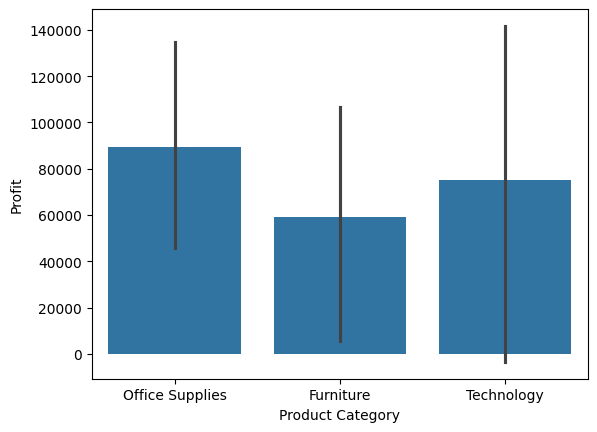

In [24]:
sns.barplot(x = "Product Category",y="Profit",data=dataset,estimator='sum')

In [25]:
data = dataset.groupby('State or Province')['Unit Price'].sum()

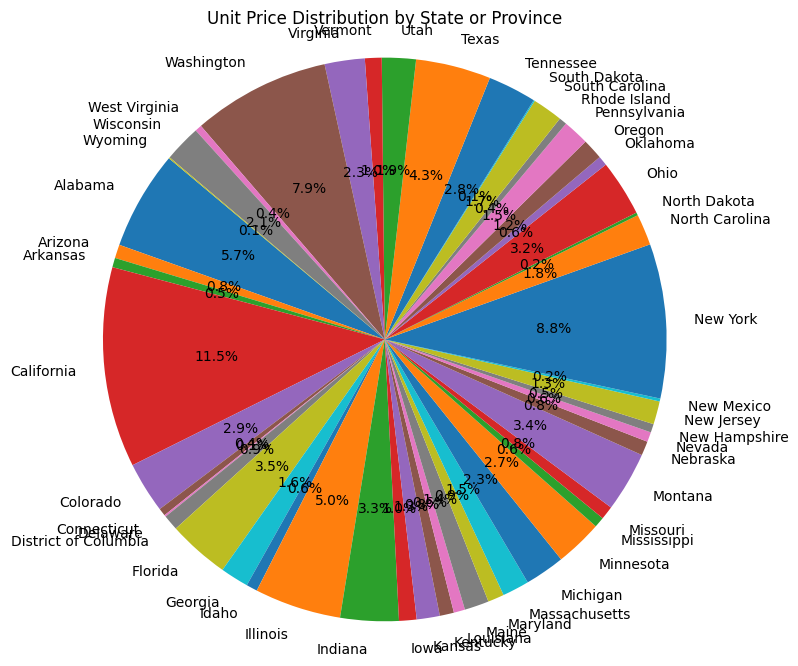

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Unit Price Distribution by State or Province')
plt.axis('equal')
plt.show()


In [27]:
dataset["State or Province"].value_counts()

State or Province
California              214
New York                129
Texas                   124
Florida                 123
Illinois                 88
Ohio                     81
Michigan                 66
Washington               61
Indiana                  53
Pennsylvania             52
Minnesota                51
Virginia                 51
North Carolina           49
Massachusetts            46
Colorado                 44
Georgia                  44
Tennessee                41
Wisconsin                39
Utah                     38
Iowa                     38
Maryland                 34
New Jersey               32
Arizona                  31
South Carolina           30
Oregon                   28
Missouri                 27
Maine                    27
Kansas                   27
Alabama                  22
Kentucky                 22
Arkansas                 22
Louisiana                20
Connecticut              20
Idaho                    20
Nebraska                 18
Ok

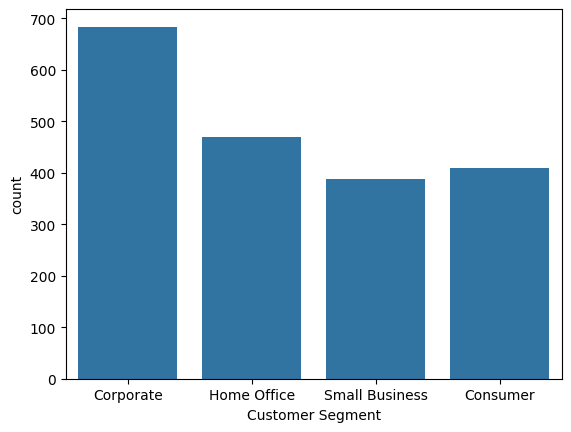

In [28]:
sns.countplot(x="Customer Segment",data = dataset)
plt.show()